In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [13]:
# Load Data
train_df = pd.read_csv("../data/train.csv")
train_df.Label = train_df.Label.astype('category')

test_df = pd.read_csv("../data/test.csv")
validation_df = pd.read_csv("../data/valid.csv")

In [5]:
train_df.describe()

,Context,Utterance,Label
count,1000000,1000000,1000000
unique,957097,736145,2
top,! op __eou__ __eot__ ? __eou__ __eot__,thank __eou__,0
freq,15,12426,500127


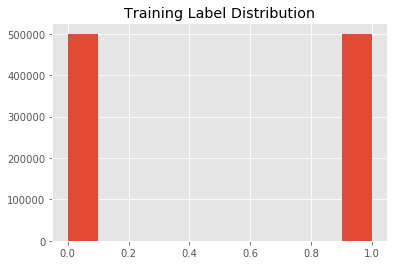

In [6]:
train_df.Label.hist()
plt.title("Training Label Distribution")

In [7]:
pd.options.display.max_colwidth = 500
train_df.head()

,Context,Utterance,Label
0,"i think we could import the old comment via rsync , but from there we need to go via email . i think it be easier than cach the status on each bug and than import bite here and there __eou__ __eot__ it would be veri easi to keep a hash db of message-id __eou__ sound good __eou__ __eot__ ok __eou__ perhap we can ship an ad-hoc apt_preferec __eou__ __eot__ version ? __eou__ __eot__ thank __eou__ __eot__ not yet __eou__ it be cover by your insur ? __eou__ __eot__ yes __eou__ but it 's realli no...",basic each xfree86 upload will not forc user to upgrad 100mb of font for noth __eou__ no someth i do in my spare time . __eou__,1
1,"i 'm not suggest all - onli the one you modifi . __eou__ __eot__ ok , it sound like you re agre with me , then __eou__ though rather than `` the one we modifi '' , my idea be `` the one we need to merg '' __eou__ __eot__",sorri __eou__ i think it be ubuntu relat . __eou__,0
2,"afternoon all __eou__ not entir relat to warti , but if grub-instal take 5 minut to instal , be this a sign that i should just retri the instal : ) __eou__ __eot__ here __eou__ __eot__ you might want to know that thinic in warti be buggi compar to that in sid __eou__ __eot__ and appar gnome be suddent almost perfect ( out of the thinic problem ) , nobodi report bug : -p __eou__ i do n't get your question , where do you want to past ? __eou__ __eot__ can i file the panel not link to ed ? : ) ...","yep . __eou__ oh , okay . i wonder what happen to you __eou__ what distro do you need ? __eou__ yes __eou__",0
3,"interest __eou__ grub-instal work with / be ext3 , fail when it be xfs __eou__ i think d-i instal the relev kernel for your machin . i have a p4 and it instal the 386 kernel __eou__ holi crap a lot of stuff get instal by default : ) __eou__ you be instal vim on a box of mine __eou__ ; ) __eou__ __eot__ more like osx than debian ; ) __eou__ we have a select of python modul avail for great justic ( and python develop ) __eou__ __eot__ 2.8 be fix them iirc __eou__ __eot__ pong __eou__ vino will...",that the one __eou__,1
4,"and becaus python give mark a woodi __eou__ __eot__ i 'm not sure if we re mean to talk about that public yet . __eou__ __eot__ and i think we be a `` pant off '' kind of compani ... : p __eou__ you need new glass __eou__ __eot__ mono 1.0 ? dude , that 's go to be a barrel of laugh for total non-releas relat reason dure hoari __eou__ read bryan clark 's entri about networkmanag ? __eou__ __eot__ there be an accompani irc convers to that one < g > __eou__ explain ? __eou__ i guess you could s...",( i think someon be go to make a joke about .au bandwidth ... ) __eou__ especi not if you re use screen ; ) __eou__,1


count    1000000.000000
mean          86.339195
std           74.929713
min            5.000000
25%           37.000000
50%           63.000000
75%          108.000000
max         1879.000000
Name: Context, dtype: float64
count    1000000.000000
mean          17.246392
std           16.422901
min            1.000000
25%            7.000000
50%           13.000000
75%           22.000000
max          653.000000
Name: Utterance, dtype: float64


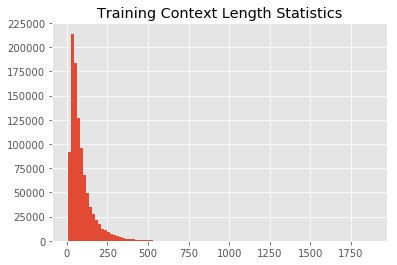

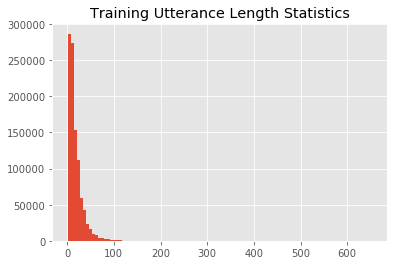

In [9]:
plt.figure(1)
train_df_context_len = train_df.Context.str.split(" ").apply(len)
train_df_context_len.hist(bins=100)
plt.title("Training Context Length Statistics")
print(train_df_context_len.describe())

plt.figure(2)
train_df_utterance_len = train_df.Utterance.str.split(" ").apply(len)
train_df_utterance_len.hist(bins=100)
plt.title("Training Utterance Length Statistics")
print(train_df_utterance_len.describe())

In [10]:
pd.options.display.max_colwidth = 500
test_df.head()

,Context,Ground Truth Utterance,Distractor_0,Distractor_1,Distractor_2,Distractor_3,Distractor_4,Distractor_5,Distractor_6,Distractor_7,Distractor_8
0,"anyon know whi my stock oneir export env var usernam ' ? i mean what be that use for ? i know of $ user but not $ usernam . my precis instal doe n't export usernam __eou__ __eot__ look like it use to be export by lightdm , but the line have the comment `` // fixm : be this requir ? '' so i guess it be n't surpris it be go __eou__ __eot__ thank ! how the heck do you figur that out ? __eou__ __eot__ https : //bugs.launchpad.net/lightdm/+bug/864109/comments/3 __eou__ __eot__",nice thank ! __eou__,"wrong channel for it , but check efnet.org , unoffici page . __eou__","everi time the kernel chang , you will lose video __eou__ yep __eou__",ok __eou__,! nomodeset > acer __eou__ i 'm assum it be a driver issu . __eou__ ! pm > acer __eou__ i do n't pm . ; ) __eou__ oop sorri for the cap __eou__,"http : //www.ubuntu.com/project/about-ubuntu/deriv ( some call them deriv , other call them flavor , same differ ) __eou__",thx __eou__ unfortun the program be n't instal from the repositori __eou__,how can i check ? by do a recoveri for test ? __eou__,my humbl apolog __eou__,# ubuntu-offtop __eou__
1,"i set up my hd such that i have to type a passphras to access it at boot . how can i remov that passwrd , and just boot up normal . i do this at instal , it work fine , just tire of have reboot where i need to be at termin to type passwd in . help ? __eou__ __eot__ backup your data , and re-instal without encrypt `` might '' be the easiest method __eou__ __eot__","so you dont know , ok , anyon els ? __eou__ you be like , yah my mous doesnt work , reinstal your os lolol what a joke __eou__","nmap be nice , but it be n't what i be look for . i final find it again : mtr ( my tracerout ) be what i be look for . i ll be keep nmap handi though . __eou__",ok __eou__,"cdrom work fine on window . __eou__ i dont think it have anyth to do with the bure process , cds work fine on my desktop and my other ubuntu lap __eou__","ah yes , i have read return as rerun __eou__",hm ? __eou__,"not the case , lts be everi other .04 releas . the .04 be n't alway more stabl __eou__ i would reinstal with precis __eou__ you can restor user data and such from backup __eou__",pretti much __eou__,i use the one i download from amd __eou__,"ffmpeg be part of the packag , quixotedon , at least i 'm quit sure it still be __eou__ if not just instal ffmpeg __eou__"
2,im tri to use ubuntu on my macbook pro retina __eou__ i read in the forum that ubuntu have a appl version now ? __eou__ __eot__ not that ive ever hear of.. normal ubutnu should work on an intel base mac . there be the ppc version also . __eou__ you want total control ? or what be you want exact ? __eou__ __eot__,just wonder how it run __eou__,"yes , that 's what i do , export it to a `` id_dsa '' file , then back to ubuntu copi it into ~/.ssh/ __eou__",noth - i be talk about the question of myhero __eou__,that should fix the font be too larg __eou__,"okay , so hcitool echo back hci0 < mac address of control > but the bluetooth devic panel keep disconnect and reconnect the devic ( or so it seem ) ani idea whi that would be ? __eou__","i get to the menu with option such as tri ubuntu ' , instal ubuntu ' , check disc ' __eou__","whi do u need analyz __eou__ it be a toy __eou__ ok msp301 __eou__ but y , i mean it be the same ubunut , onli with older program __eou__ ubuntu 804 or 1204 __eou__ no i dont use 804 __eou__ i be ask hypo qs __eou__",cntrl-c may stop the command but it doe n't fix my hdd problem . __eou__,"if you re onli go to run ubuntu , just get a normal pc rather than a mac __eou__ that say , i 'm run it on a macbook , becaus i get one relat cheapli __eou__",the one which be not pick up at the moment be on stderr and not stdout and > be onli cover stdout __eou__
3,"no suggest ? __eou__ link ? __eou__ how can i remov luk passphras at boot . i dont want to use fea

In [11]:
test_df.describe()

,Context,Ground Truth Utterance,Distractor_0,Distractor_1,Distractor_2,Distractor_3,Distractor_4,Distractor_5,Distractor_6,Distractor_7,Distractor_8
count,18920,18920,18920,18920,18920,18920,18920,18920,18920,18920,18920
unique,18920,17914,13982,13902,14077,14041,14101,14072,13969,13975,14123
top,can anyon help me with python __eou__ i have instal python3 on 12.04 but python -v still show 2.7 instal __eou__ __eot__ better call turtl man he isgood with python __eou__ dpkg -l | grep python you probabl have both version __eou__ __eot__ yes that true i have both version .. how do i make python3 default ? __eou__ __eot__ guest2493 do you need both ? could apt-get remov python2.7 perhap __eou__ __eot__ i can do that.. i be scare that the system shouldnt crash due to that as a lot of thing ...,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__
freq,1,186,176,186,194,195,167,197,190,188,201
